In [1]:
# WARMUP 10/13/20

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

# My Solutions

### QUESTION ONE
For df1:

Take a look at the data in df1.
- Does x increase from time one to time two?
- Visualize the relationship between x and time.
- Run a statistical test to further examine the relationship between these features.

In [3]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [4]:
df1.describe()

,x
count,200.000000
mean,6.511559
std,2.180756
min,0.556924
25%,4.895169
50%,6.507704
75%,8.261932
max,12.958625


In [5]:
df1.x.mean()

6.511558766196372

In [6]:
df1_time_one = df1[df1.time == 'one']
df1_time_two = df1[df1.time == 'two']
print(f'When time = "one", the mean for x is {df1_time_one.mean()[0]}')
print(f'When time = "two", the mean for x is {df1_time_two.mean()[0]}')

When time = "one", the mean for x is 5.726669425801799
When time = "two", the mean for x is 7.296448106590939


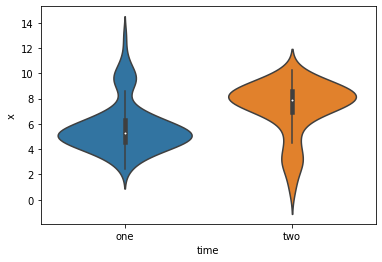

In [7]:
sns.violinplot(data=df1, x='time', y='x')

In [8]:
alpha = .05
t, p = stats.ttest_ind(df1_time_one.x, df1_time_two.x)
print(t, p)

-5.443902721870272 1.5320971681720527e-07


In [9]:
p < alpha

True

The mean for time one is smaller than the mean for time two.

### QUESTION TWO
For df2:

Take a look at the data in df2.
- Visualize the relationship between x and y.
- How would you describe the relationship between x and y?
- Run a statistical test to examine the relationship between x and y.

In [10]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


In [11]:
df2.describe()

,x,y
count,200.000000,200.000000
mean,99.980573,606.099784
std,7.753863,26.958585
min,84.542520,542.096437
25%,93.056095,586.579382
50%,100.095115,599.022923
75%,107.320842,629.098231
max,114.606179,665.250458


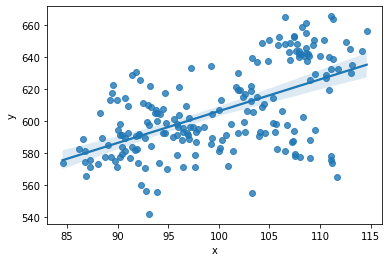

In [12]:
sns.regplot(data=df2, x='x', y='y')

In [13]:
# As x increases, y tends to increase

In [14]:
corr, p = stats.pearsonr(df2.x, df2.y)
print(corr, p)

0.5693902765694359 1.3960403186191819e-18


In [15]:
p < alpha

True

There is a moderate to strong positive linear correlation between x and y.

### QUESTION THREE
For df3:

Take a look at the data in df3
- Which surgeon has the higher success rate?
- If you had to have heart bypass surgery, which surgeon should you go to?

In [16]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [17]:
surgeon_a = df3[df3.surgeon == 'A']
surgeon_b = df3[df3.surgeon == 'B']

In [18]:
surgeon_a.success.mean()

0.8770833333333333

In [19]:
surgeon_b.success.mean()

0.7230769230769231

Surgeon A has the overall higher success rate

In [20]:
surgeon_a_heart = df3[df3.surgeon == 'A'][df3.surgery == 'heart bypass']
surgeon_b_heart = df3[df3.surgeon == 'B'][df3.surgery == 'heart bypass']

In [21]:
surgeon_a_heart.success.mean()

0.6565656565656566

In [22]:
surgeon_b_heart.success.mean()

0.6722488038277512

Surgeon B has a slightly higher success rate than Surgeon A for heart bypass

### QUESTION FOUR
For df1 and df2, what happens to the relationships if you take into account the group feature?

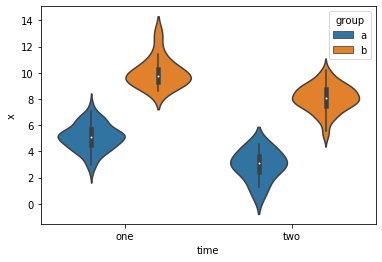

In [23]:
sns.violinplot(data=df1, x='time', y='x', hue='group')

From visual inspection, Group B has higher means for both time = 'one' and time = 'two', and for both group A and group B, the mean x for time = 'one' is higher than the mean x for time = 'two'

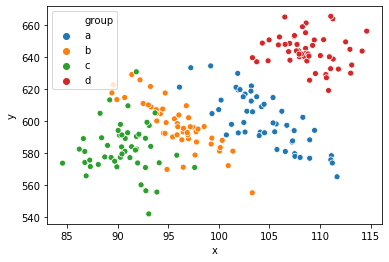

In [24]:
sns.scatterplot(data=df2, x='x', y='y', hue='group')

For df2, the relationship between group and x and y is more complicated. When each group is examined individually, there appears to be either no correlation between x and y (such is the case in groups 'c' and 'd') or there is a moderate negative correlation between x and y (such is the case in groups 'a' and 'b')

# Instructor Solutions

In [25]:
df3.groupby('surgeon').success.mean()

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

In [26]:
df3.groupby(['surgeon', 'surgery']).success.mean()

surgeon  surgery     
A        appendectomy    0.934383
         heart bypass    0.656566
B        appendectomy    0.931373
         heart bypass    0.672249
Name: success, dtype: float64

In [27]:
df3.groupby(['surgeon', 'surgery']).size()

surgeon  surgery     
A        appendectomy    381
         heart bypass     99
B        appendectomy    102
         heart bypass    418
dtype: int64

Look at the relative experience of each surgeon in each type of surgery. Surgeon A's higher success rate may be due to their greater proportion of 'easier' appendectomies. 

In [28]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

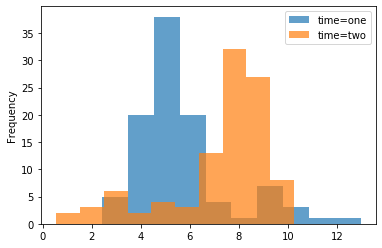

In [29]:
ax = df1[df1.time == 'one'].x.plot.hist(label='time=one', alpha=.7)
df1[df1.time == 'two'].x.plot.hist(label='time=two', ax=ax, alpha=.7)
ax.legend()
#It appears that time=two has a higher mean than time=one

In [30]:
df1.groupby(['group', 'time']).x.mean()
# But when we look at time within each group, it appears that time=one is bigger than time=two...

group  time
a      one      5.084092
       two      2.936197
b      one     10.026997
       two      8.065904
Name: x, dtype: float64

In [31]:
df1.groupby(['group', 'time']).size()
#It appears the based on the size of time subgroups within group a and group b, 
#when we look only at group, we see an increase in x because we are shifting from looking at mostly group one to mostly group two

group  time
a      one     87
       two     15
b      one     13
       two     85
dtype: int64

In [32]:
# The average x value is higher at time two compared to time one
# The average x value is lower for both groups at time two compared to time one

p =  1.3960403186191819e-18


[Text(0.5, 1.0, 'r = 0.5694')]

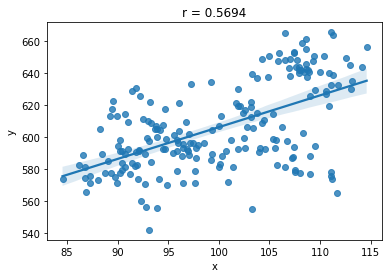

In [33]:
r, p = stats.pearsonr(df2.x, df2.y)
print('p = ', p)

ax = sns.regplot(data=df2, y='y', x='x')
ax.set(title=f'r = {r:.4f}')

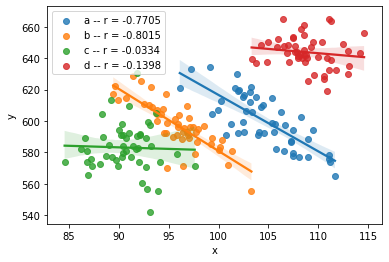

In [34]:
for group, subset in df2.groupby('group'):
    r, p = stats.pearsonr(subset.x, subset.y)
    sns.regplot(data=subset, x='x', y='y', label=f'{group} -- r = {r:.4f}')
plt.legend()

## Simpson's Paradox
When a relationship between 2 variables reverses itself when controlling for a third variable.

Takeaways:
- visualize the interactions of multiple variables 
- domain knowledge is key
- statistical testing is not the whole story
- be careful about assumptions around group membership/group proportions